<a href="https://colab.research.google.com/github/pratikchopade21-a11y/IPCV-Lab/blob/main/Exp_03_IPCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name:-Pratik Mahesh Chopade
#PRN:-2324001102
#Roll no.:- AIML B59
#IPCV EXP.:-03(Image Enhancement and Histogram Equalization)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the image in grayscale mode
img = cv2.imread("/content/car_image.jpg", 0)

# Check if image is loaded properly
if img is None:
    print("Image not found")
    exit()


In [ ]:
# Get image dimensions
rows, cols = img.shape
total_pixels = rows * cols


In [ ]:
# Initialize histogram with 256 zeros
hist = np.zeros(256, dtype=int)

# Calculate histogram manually
for i in range(rows):
    for j in range(cols):
        pixel_value = img[i][j]
        hist[pixel_value] += 1


In [ ]:
# Normalize histogram
hist_norm = hist / total_pixels


In [ ]:
cdf = np.zeros(256)
cdf[0] = hist_norm[0]

for i in range(1, 256):
    cdf[i] = cdf[i - 1] + hist_norm[i]


In [ ]:
# Mapping old gray levels to new gray levels
mapping = np.zeros(256, dtype=np.uint8)

for i in range(256):
    mapping[i] = round(255 * cdf[i])


In [ ]:
# Create empty image for result
equalized_img = np.zeros_like(img)

for i in range(rows):
    for j in range(cols):
        equalized_img[i][j] = mapping[img[i][j]]


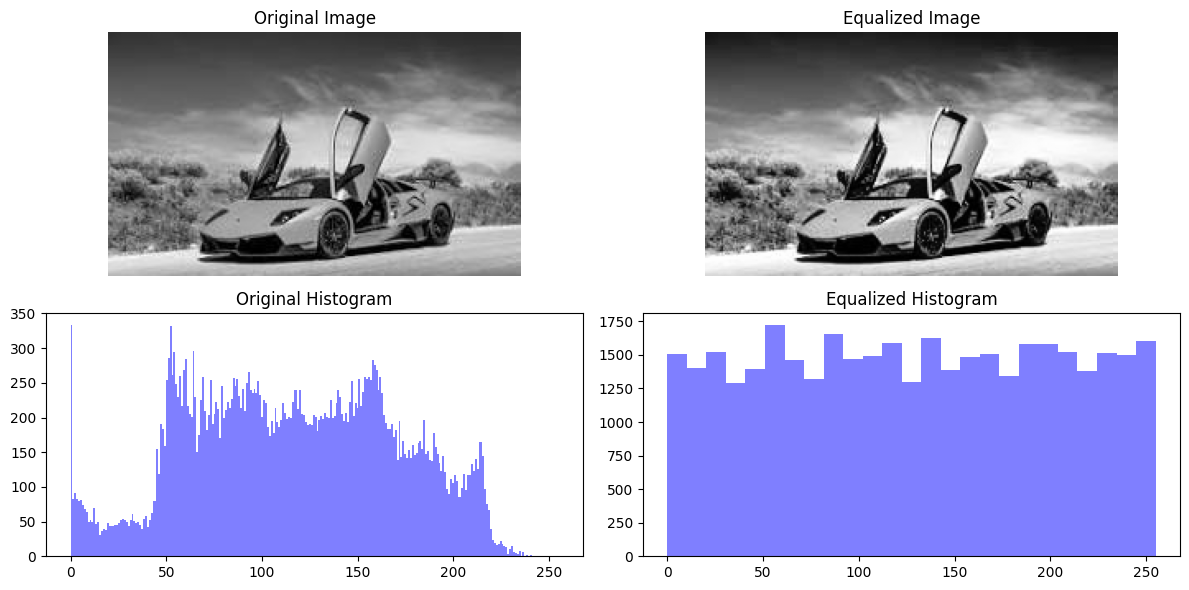

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

#Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

#Equalized Image
plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.axis("off")

#Original Histogram
plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.hist(img.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.5)

#Equalized histogram
plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.hist(equalized_img.ravel(), bins=25, range=(0, 255), color='blue', alpha=0.5)

plt.tight_layout()
plt.show()


#Method 2: Histogram Equalization using OpenCV (Built-in)

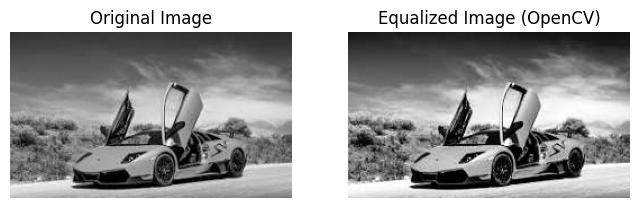

In [ ]:
# Read grayscale image
img = cv2.imread("/content/car_image.jpg", 0)

# Apply OpenCV histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display result
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Equalized Image (OpenCV)")
plt.imshow(equalized_img, cmap='gray')
plt.axis("off")

plt.show()


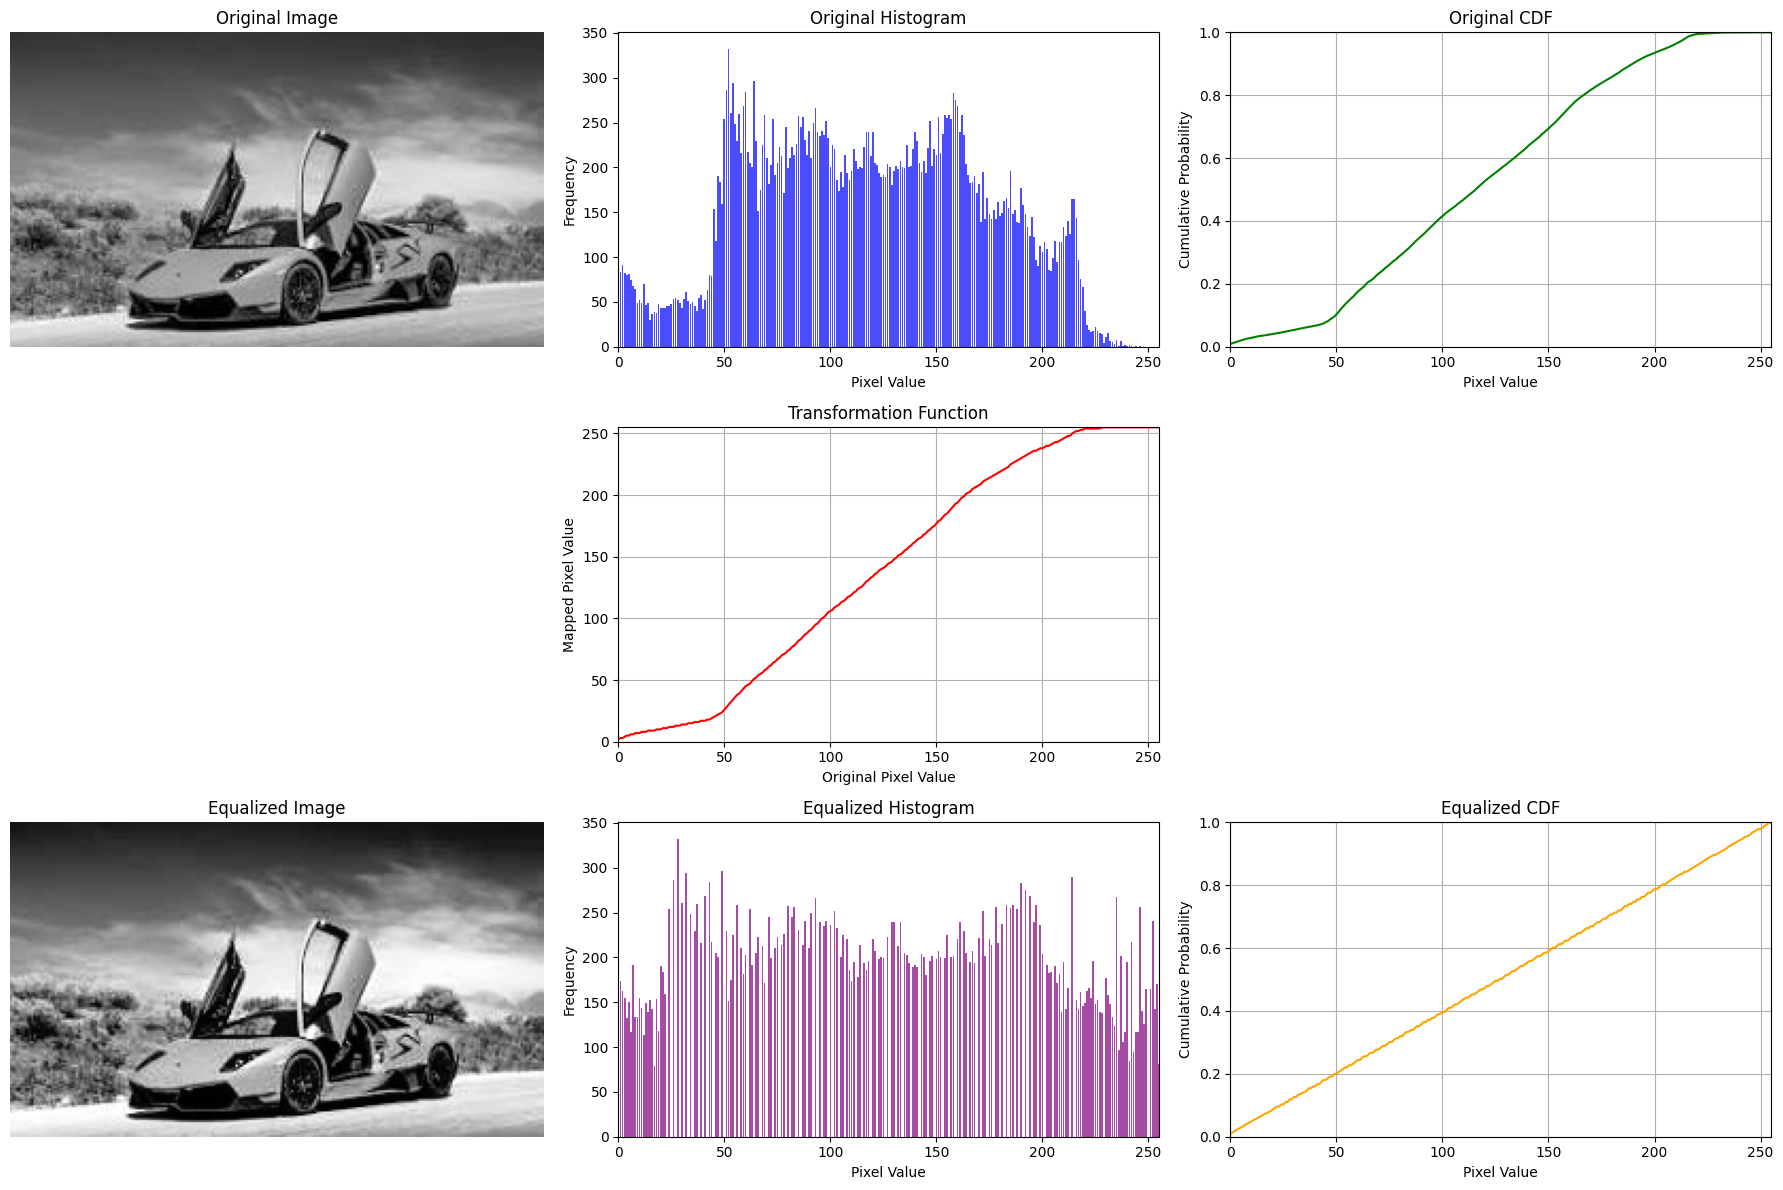

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Calculate histogram for the equalized image
hist_equalized = np.zeros(256, dtype=int)
for i in range(rows):
    for j in range(cols):
        pixel_value = equalized_img[i][j]
        hist_equalized[pixel_value] += 1

# Normalize equalized histogram
hist_equalized_norm = hist_equalized / total_pixels

# Calculate CDF for the equalized image
cdf_equalized = np.zeros(256)
cdf_equalized[0] = hist_equalized_norm[0]
for i in range(1, 256):
    cdf_equalized[i] = cdf_equalized[i - 1] + hist_equalized_norm[i]

# Create a figure with a grid of subplots for comprehensive visualization
plt.figure(figsize=(18, 12))

# 1. Original Image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

# 2. Original Histogram
plt.subplot(3, 3, 2)
plt.title("Original Histogram")
plt.bar(range(256), hist, color='blue', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])

# 3. Original CDF
plt.subplot(3, 3, 3)
plt.title("Original CDF")
plt.plot(range(256), cdf, color='green')
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Probability")
plt.xlim([0, 255])
plt.ylim([0, 1])
plt.grid(True)

# 4. Transformation Function
plt.subplot(3, 3, 5) # Centered for clarity
plt.title("Transformation Function")
plt.plot(range(256), mapping, color='red')
plt.xlabel("Original Pixel Value")
plt.ylabel("Mapped Pixel Value")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.grid(True)

# 5. Equalized Image
plt.subplot(3, 3, 7)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.axis("off")

# 6. Equalized Histogram
plt.subplot(3, 3, 8)
plt.title("Equalized Histogram")
plt.bar(range(256), hist_equalized, color='purple', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])

# 7. Equalized CDF
plt.subplot(3, 3, 9)
plt.title("Equalized CDF")
plt.plot(range(256), cdf_equalized, color='orange')
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Probability")
plt.xlim([0, 255])
plt.ylim([0, 1])
plt.grid(True)

plt.tight_layout()
plt.show()